<a href="https://colab.research.google.com/github/gulcan-dgn/UK-crimerate-Time-Series-Analysis-/blob/main/uk_crime_rate_Different_time_series_method_comparing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/GULCAN DOGAN DISERTATION /LONDON CRIME DATA /MPS Borough Level Crime without corona .csv')

data.columns = ['Month','CrimeRate']
data.tail()

Mounted at /content/drive


,Month,CrimeRate
112,2019-08-01,76590
113,2019-09-01,76154
114,2019-10-01,81465
115,2019-11-01,78917
116,2019-12-01,74870


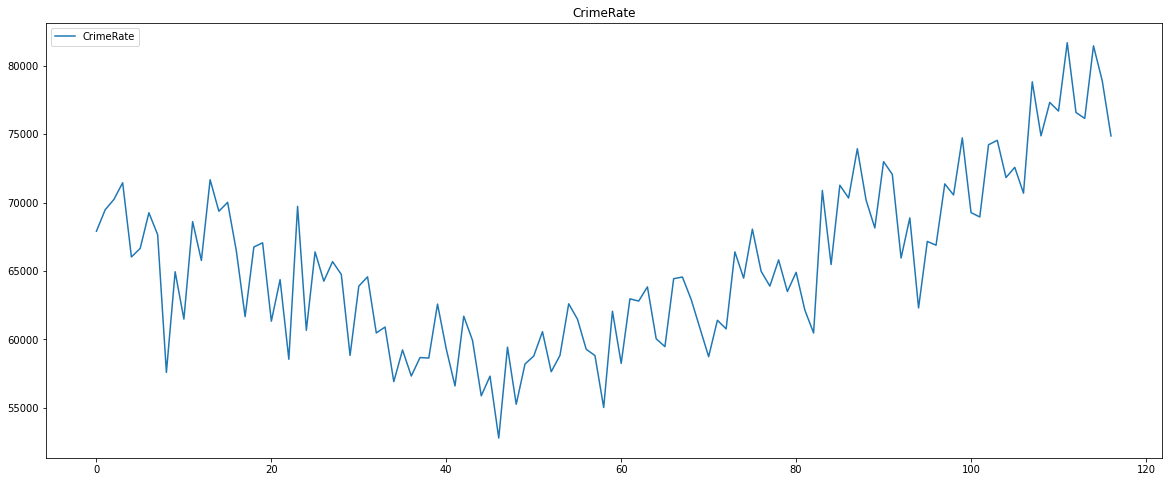

In [2]:
data.plot(figsize=(20, 8))

plt.legend(loc='best')
plt.title('CrimeRate')
plt.savefig('CrimeRate.png', transparent=True, bbox_inches='tight')
plt.show(block=False)

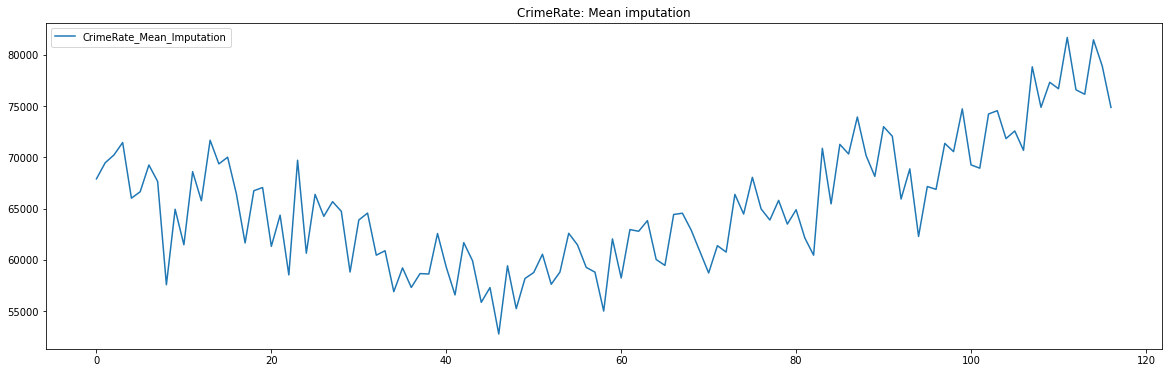

In [3]:
data = data.assign(CrimeRate_Mean_Imputation=data.CrimeRate.fillna(data.CrimeRate.mean()))
data[['CrimeRate_Mean_Imputation']].plot(figsize=(20, 6))

plt.legend(loc='best')
plt.title('CrimeRate: Mean imputation')
plt.show(block=False)

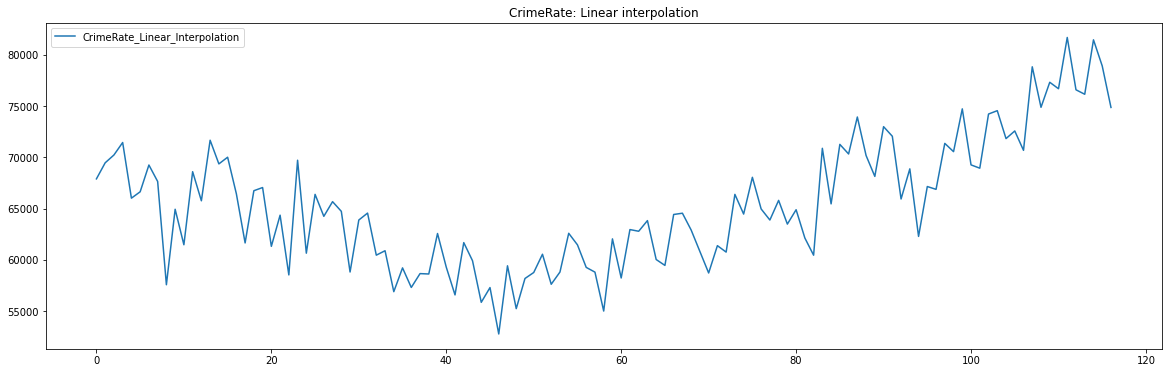

In [4]:
data = data.assign(CrimeRate_Linear_Interpolation=data.CrimeRate.interpolate(method='linear'))
data[['CrimeRate_Linear_Interpolation']].plot(figsize=(20, 6))

plt.legend(loc='best')
plt.title('CrimeRate: Linear interpolation')
plt.show(block=False)

In [5]:
data['CrimeRate'] = data['CrimeRate_Linear_Interpolation']
data.drop(columns=['CrimeRate_Mean_Imputation','CrimeRate_Linear_Interpolation'],inplace=True)
data.head()

,Month,CrimeRate
0,2010-04-01,67901
1,2010-05-01,69468
2,2010-06-01,70230
3,2010-07-01,71448
4,2010-08-01,66019


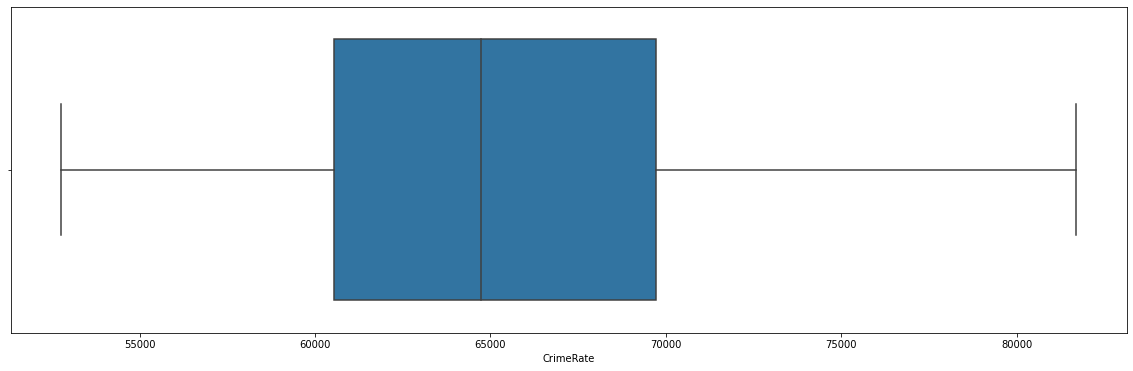

In [6]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 6))
ax = sns.boxplot(x=data['CrimeRate'],whis=1.5)

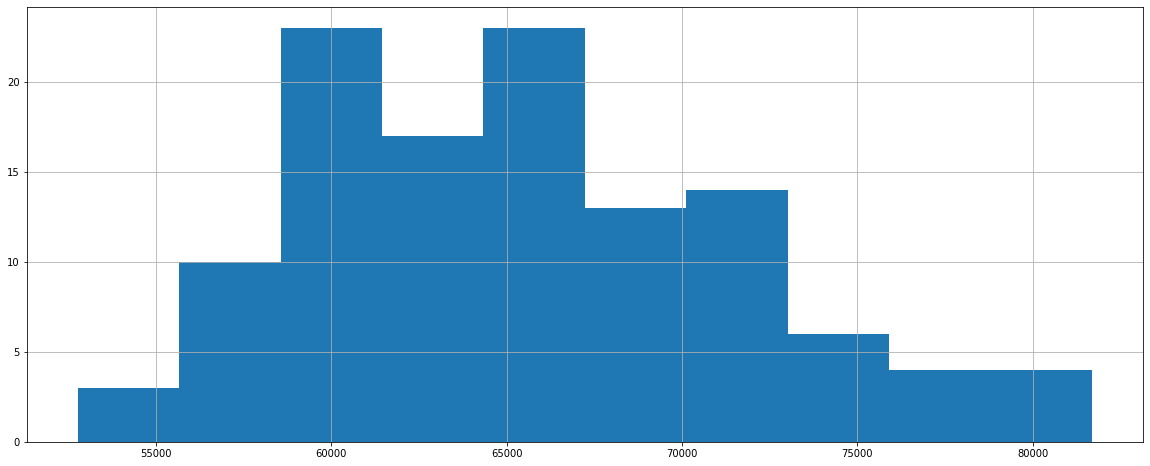

In [7]:
fig = data.CrimeRate.hist(figsize = (20, 8))


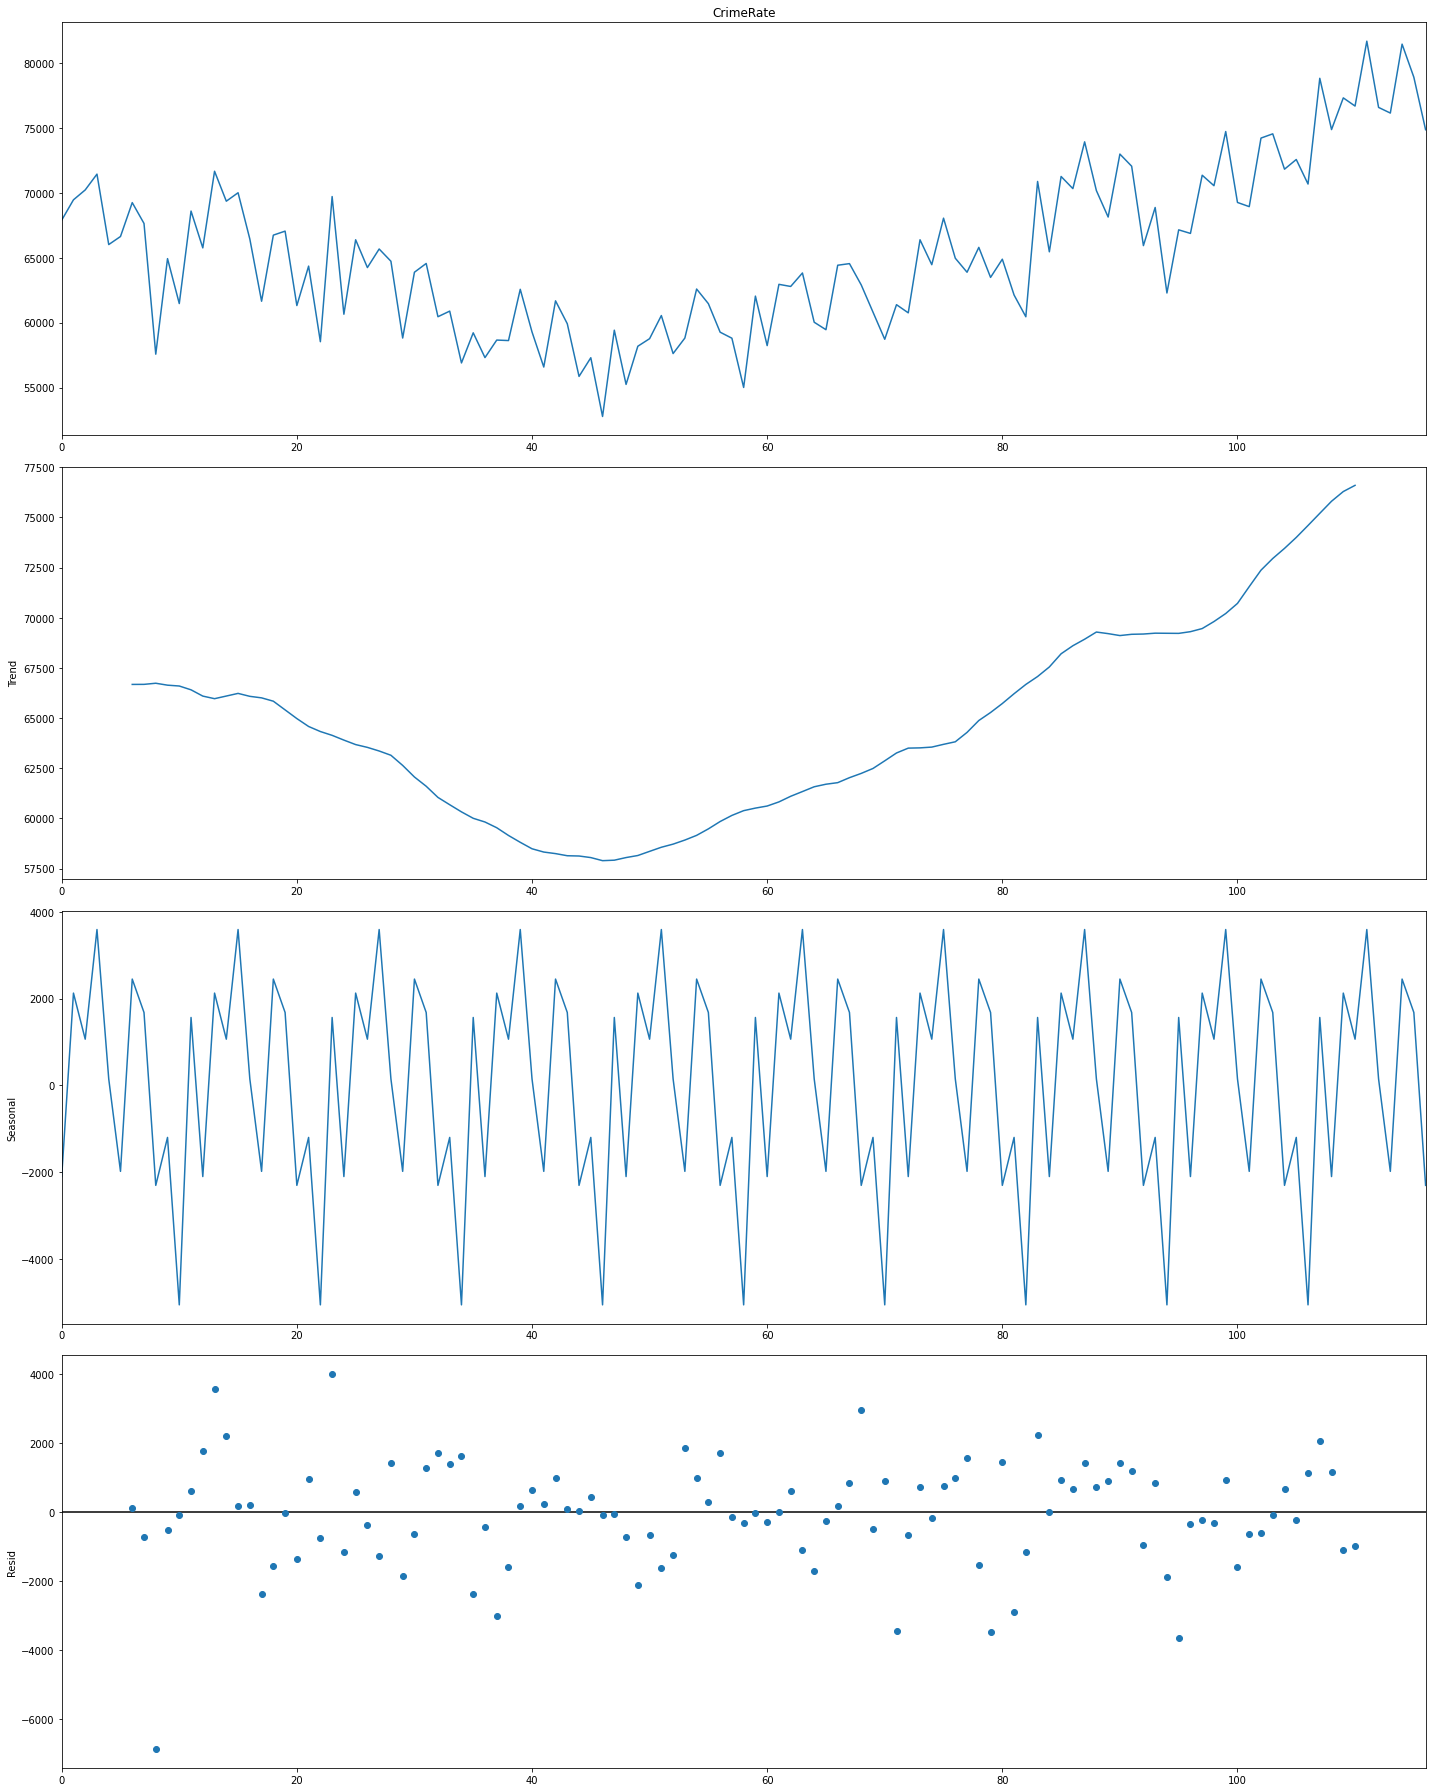

In [8]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,25
decomposition = sm.tsa.seasonal_decompose(data.CrimeRate, freq=12, model='additive')
 # additive seasonal index
fig = decomposition.plot()
plt.savefig('CrimeRate with Trend-Seasonal-Residual .png', transparent=True, bbox_inches='tight')
plt.show()

In [9]:
train_len = 100
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [10]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['CrimeRate'][train_len-1]

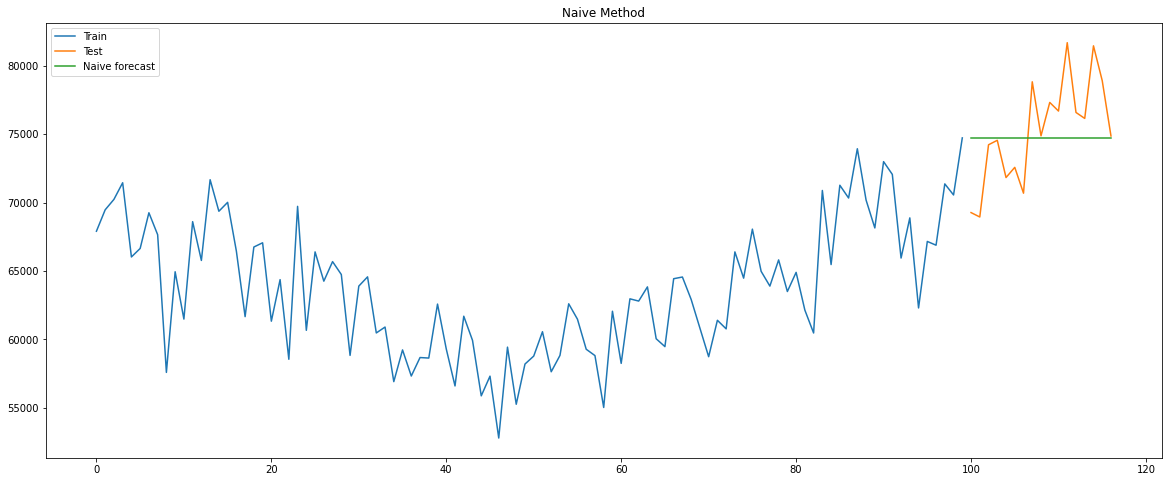

In [11]:
plt.figure(figsize=(20,8))

plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.savefig('Naive Method Forecast.png', transparent=True, bbox_inches='tight')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_naive['naive_forecast'])/test['CrimeRate'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99


In [13]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['CrimeRate'].mean()

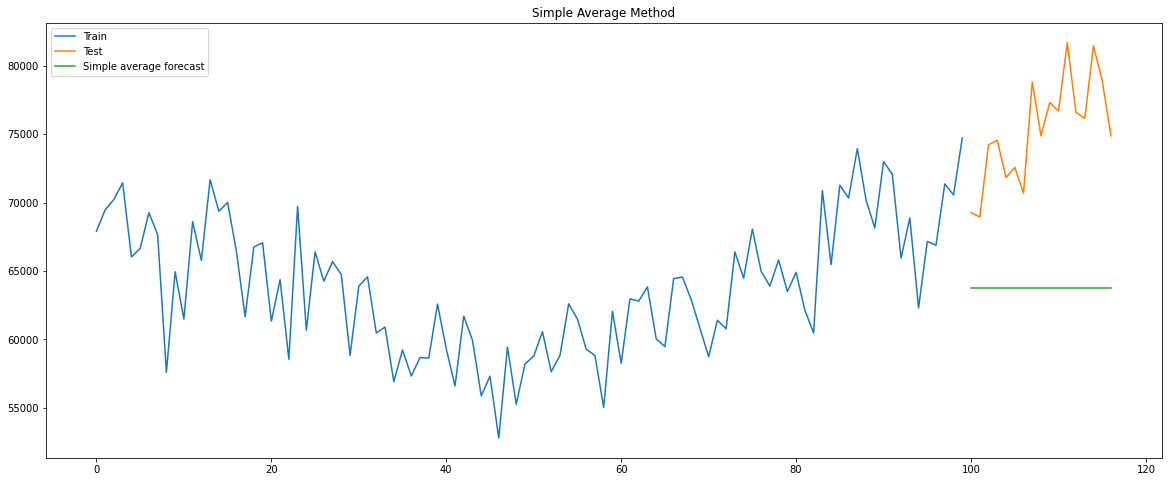

In [14]:
plt.figure(figsize=(20, 8))

plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.savefig('Simple Average Forecast Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_avg['avg_forecast'])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07


In [16]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['CrimeRate'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

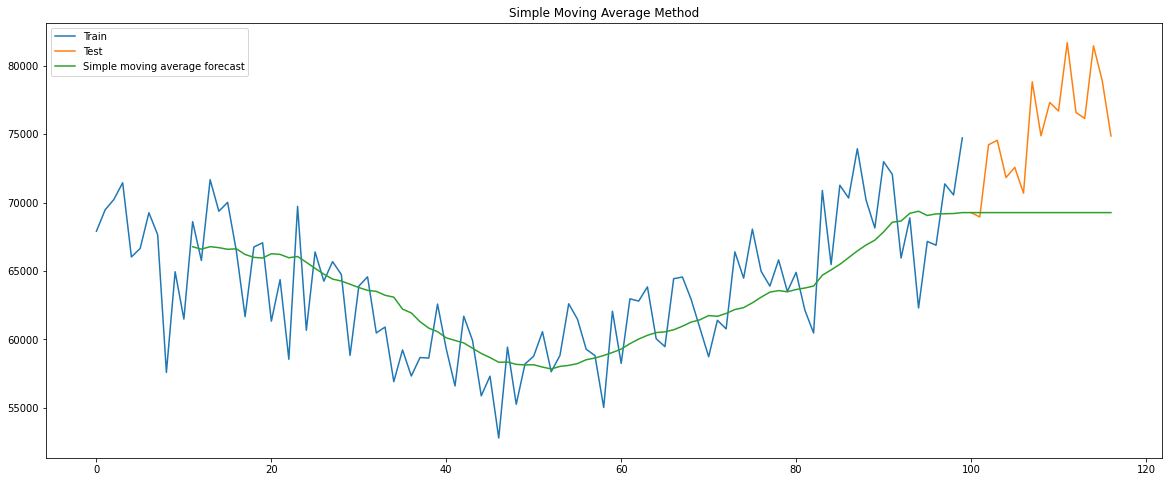

In [17]:
plt.figure(figsize=(20,8))

plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.savefig('Simple Moving Average Forecast Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_sma['sma_forecast'][train_len:])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80


In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['CrimeRate'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

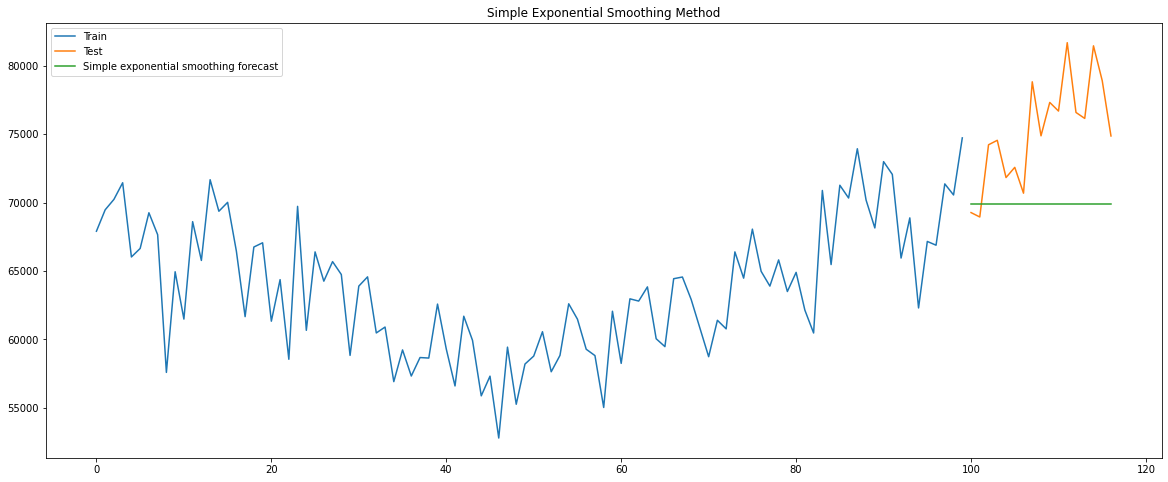

In [20]:
plt.figure(figsize=(20,8))

plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.savefig('Simple Exponential Smoothing Forecast Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_ses['ses_forecast'])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['CrimeRate']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 67901.0, 'initial_trend': 1567.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


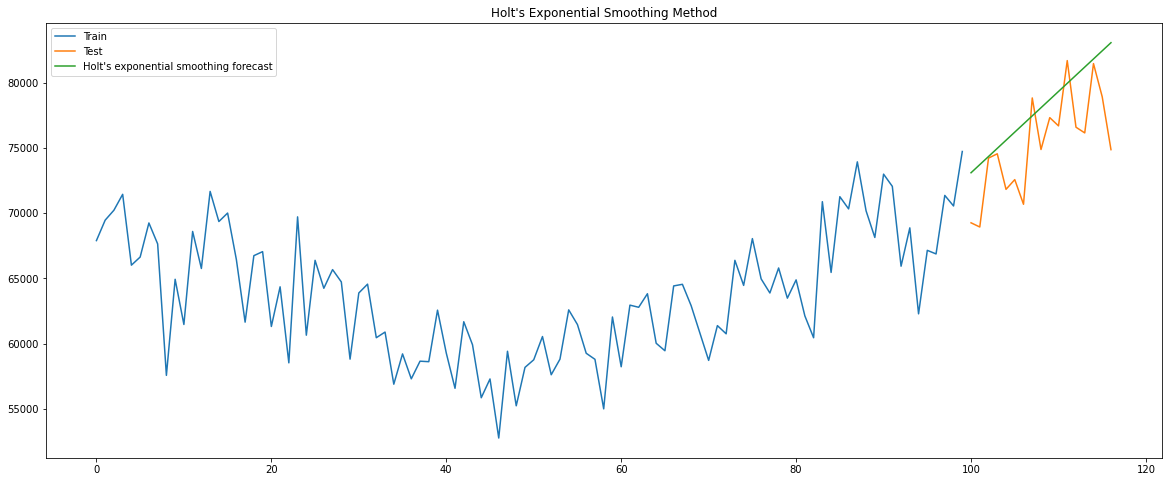

In [23]:
plt.figure(figsize=(20,8))

plt.plot( train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.savefig('Holt\'s Exponential Smoothing Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_holt['holt_forecast'])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31


In [25]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['CrimeRate']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(17)

{'smoothing_level': 0.3585714285714286, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.3904347826086957, 'damping_trend': nan, 'initial_level': 62022.11111111111, 'initial_trend': -59.368055555555564, 'initial_seasons': array([ 5878.88888889,  7445.88888889,  8207.88888889,  9425.88888889,
        3996.88888889,  4618.88888889,  7230.88888889,  5624.88888889,
       -4449.11111111,  2913.88888889,  -548.11111111,  6578.88888889]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


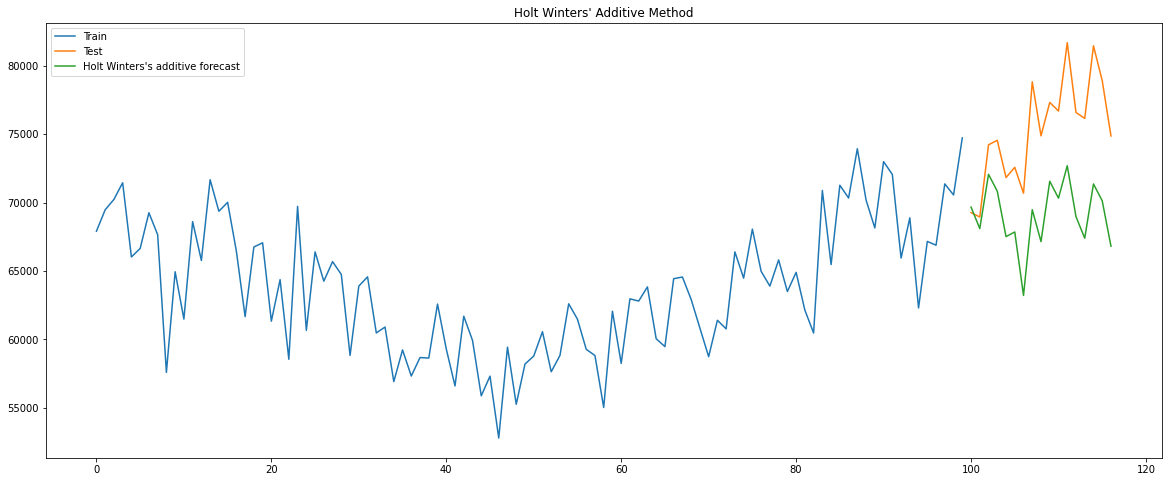

In [26]:
plt.figure(figsize=(20,8))

plt.plot( train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.savefig('Holt Winters\' Additive Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_hwa['hw_forecast'])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09


In [28]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['CrimeRate']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(17)

{'smoothing_level': 0.39392857142857146, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': 0.35813311688311694, 'damping_trend': nan, 'initial_level': 62022.11111111111, 'initial_trend': -59.368055555555564, 'initial_seasons': array([1.09478698, 1.12005217, 1.13233811, 1.15197627, 1.06444297,
       1.07447165, 1.11658566, 1.09069167, 0.92826573, 1.04698145,
       0.99116265, 1.10607328]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


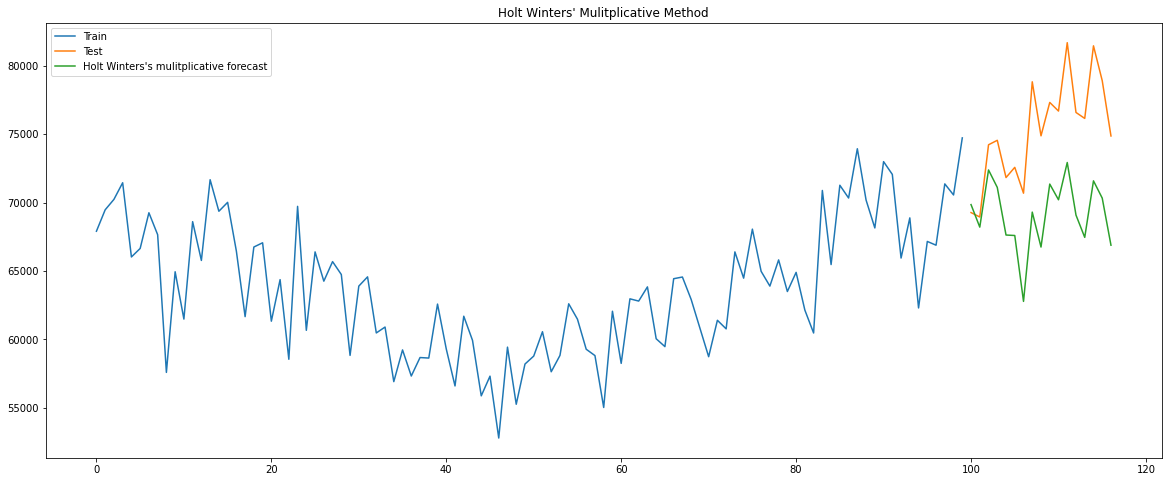

In [29]:
plt.figure(figsize=(20,8))

plt.plot( train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.savefig('Holt Winters\' Mulitplicative Forecast Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_hwm['hw_forecast'])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10


In [31]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['CrimeRate'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.137514
Critical Values @ 0.05: -2.89
p-value: 0.945571


In [32]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['CrimeRate'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.461828
Critical Values @ 0.05: 0.46
p-value: 0.050505


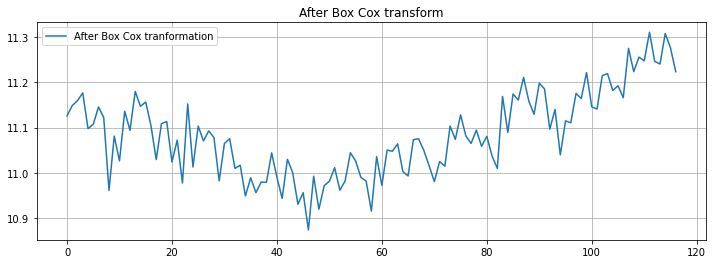

In [33]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['CrimeRate'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.grid()
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

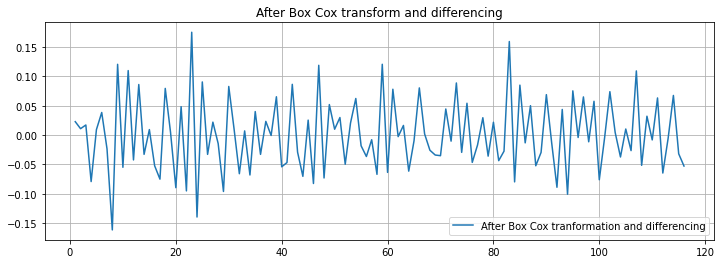

In [34]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [35]:
data_boxcox_diff.dropna(inplace=True)

In [36]:
data_boxcox_diff.tail()

112   -0.064526
113   -0.005709
114    0.067416
115   -0.031777
116   -0.052643
dtype: float64

In [37]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.694036
Critical Values @ 0.05: -2.89
p-value: 0.434188


In [38]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.276094
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


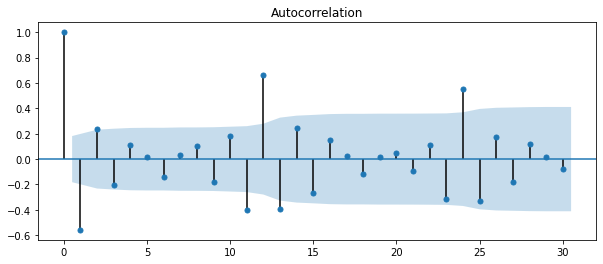

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,4))
plt.grid(False)
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.savefig('Autocorrelation function (ACF).png', transparent=True, bbox_inches='tight')
plt.show()

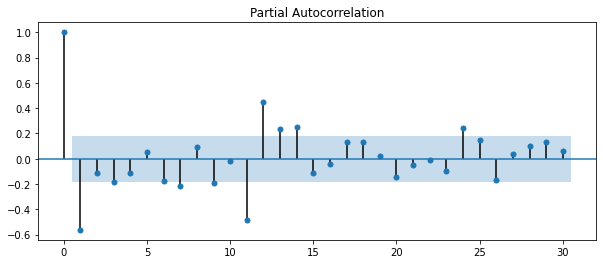

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,4))
plt.grid(False)
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.savefig('Partial autocorrelation function (PACF).png', transparent=True, bbox_inches='tight')
plt.show()

In [41]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [42]:
train_data_boxcox_diff[:10]

1     0.022815
2     0.010909
3     0.017194
4    -0.079027
5     0.009377
6     0.038446
7    -0.023463
8    -0.161249
9     0.120348
10   -0.054788
dtype: float64

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.000678
ar.L1.y   -0.569912
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [44]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


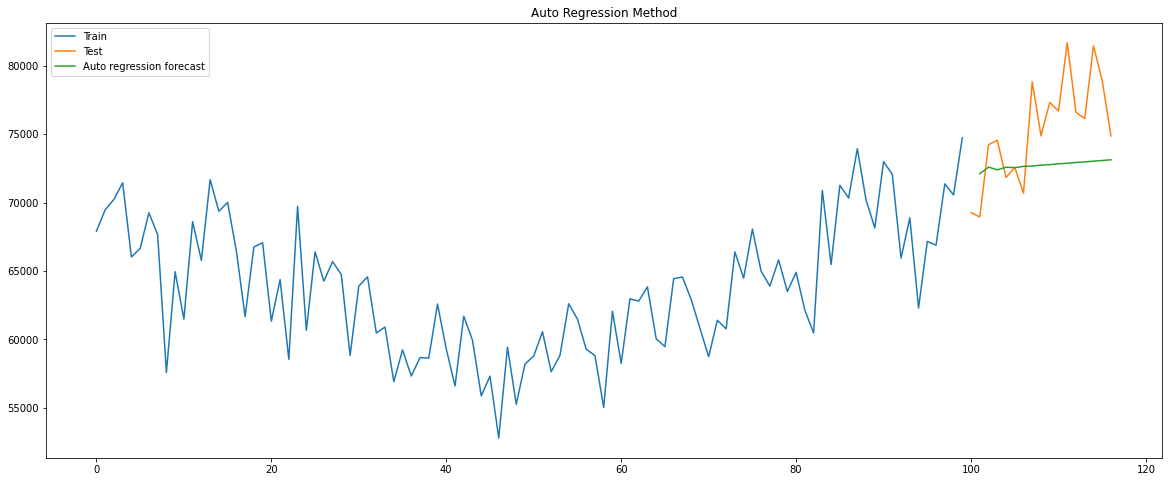

In [45]:
plt.figure(figsize=(20,8))
plt.grid(False)
plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.savefig('Auto Regression Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_ar['ar_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_ar['ar_forecast'][test.index.min():])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10
0,Autoregressive (AR) method,4354.02,4.69


In [47]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.000353
ma.L1.y   -0.667730
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [48]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


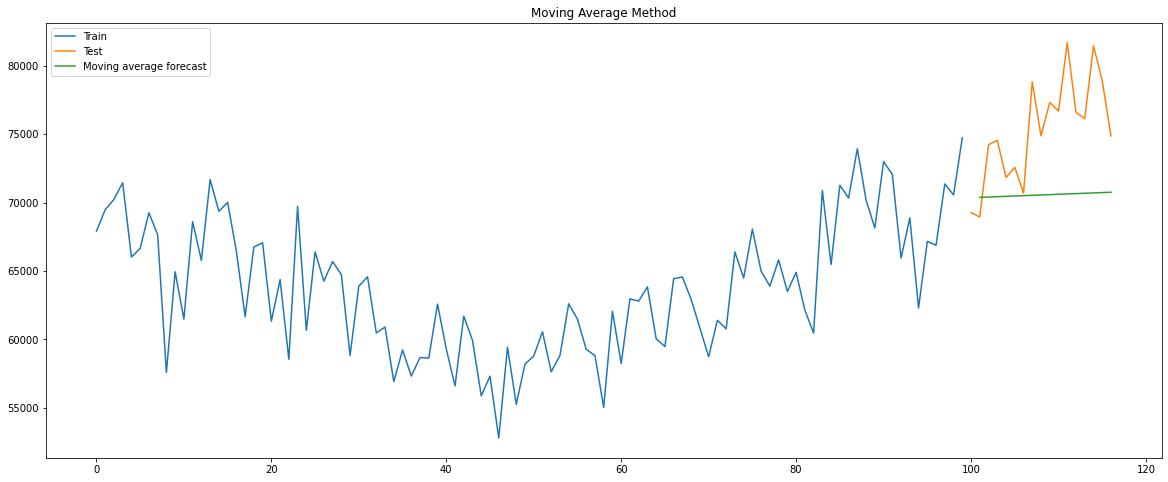

In [49]:
plt.figure(figsize=(20,8))
plt.grid(False)
plt.plot(data['CrimeRate'][:train_len], label='Train')
plt.plot(data['CrimeRate'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.savefig('Moving Average Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_ma['ma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_ma['ma_forecast'][test.index.min():])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10
0,Autoregressive (AR) method,4354.02,4.69
0,Moving Average (MA) method,5935.24,6.77


In [51]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.000562
ar.L1.y   -0.371668
ma.L1.y   -0.286487
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [52]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


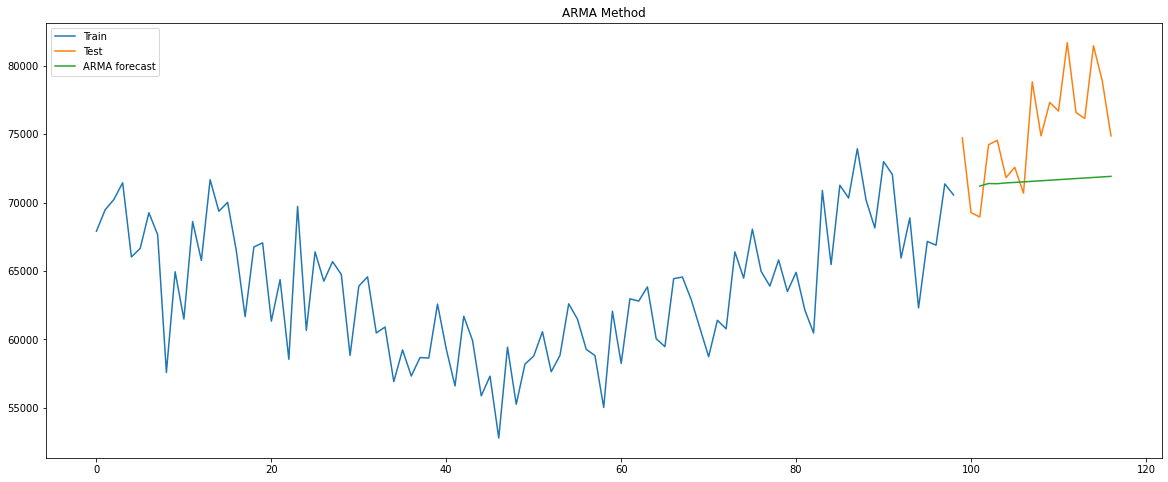

In [53]:
plt.figure(figsize=(20,8))
plt.grid(False)
plt.plot( data['CrimeRate'][:train_len-1], label='Train')
plt.plot(data['CrimeRate'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.savefig('ARMA Method.png', transparent=True, bbox_inches='tight')
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_arma['arma_forecast'][train_len-1:])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10
0,Autoregressive (AR) method,4354.02,4.69
0,Moving Average (MA) method,5935.24,6.77
0,Autoregressive moving average (ARMA) method,5116.29,5.55


In [55]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.000562
ar.L1.D.y   -0.371668
ma.L1.D.y   -0.286487
dtype: float64


In [56]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

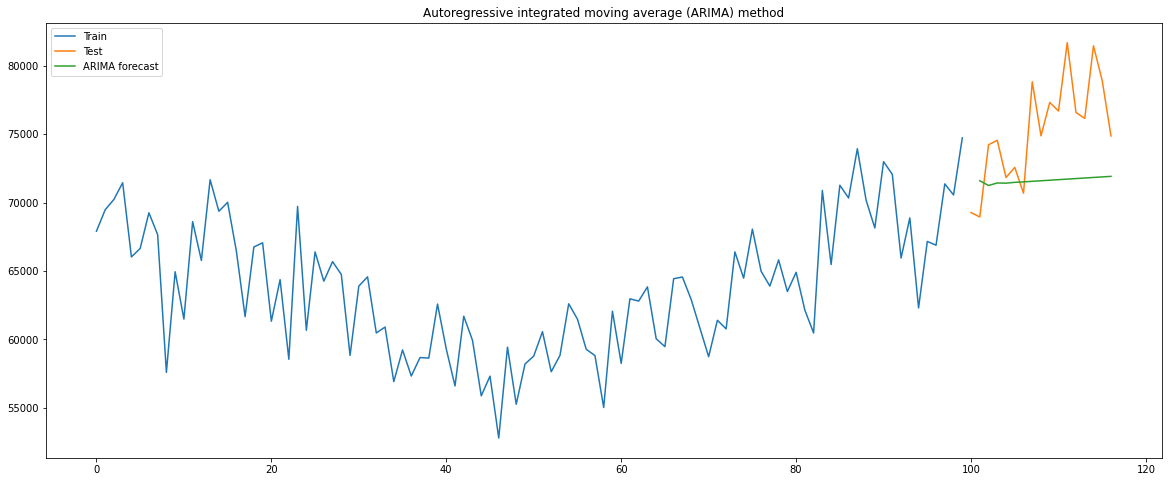

In [57]:
plt.figure(figsize=(20,8))
plt.grid(False)
plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.savefig('Autoregressive integrated moving average (ARIMA) method.png', transparent=True, bbox_inches='tight')
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_arima['arima_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_arima['arima_forecast'][test.index.min():])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10
0,Autoregressive (AR) method,4354.02,4.69
0,Moving Average (MA) method,5935.24,6.77
0,Autoregressive moving average (ARMA) method,5116.29,5.55


In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.181283
ma.L1      -0.384489
ar.S.L12    0.098536
ma.S.L12   -0.770167
sigma2      0.001087
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [60]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

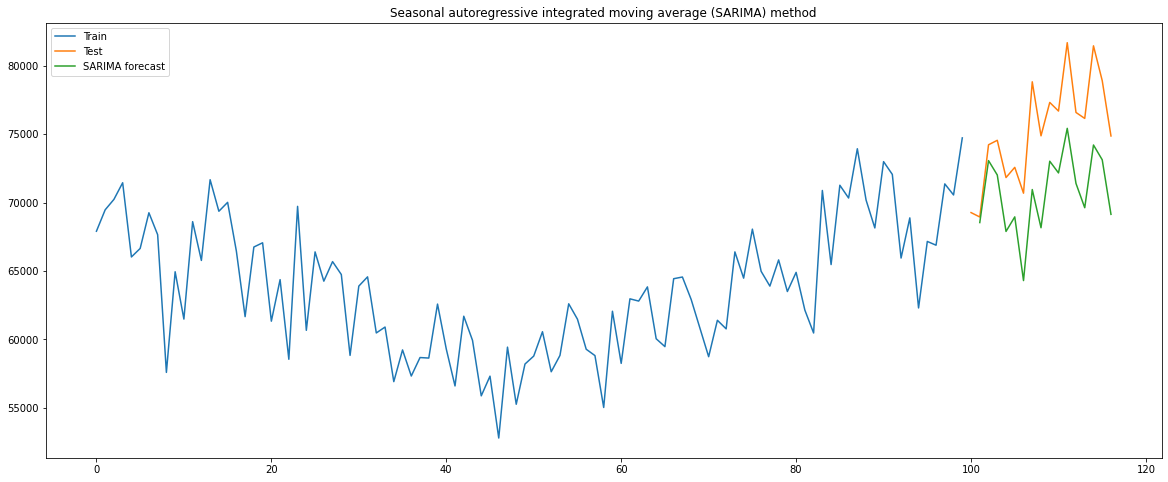

In [61]:
plt.figure(figsize=(20,8))
plt.grid(False)
plt.plot(train['CrimeRate'], label='Train')
plt.plot(test['CrimeRate'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.savefig('Seasonal autoregressive integrated moving average (SARIMA) method.png', transparent=True, bbox_inches='tight')

plt.show()

In [62]:
rmse = np.sqrt(mean_squared_error(test['CrimeRate'], y_hat_sarima['sarima_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['CrimeRate']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['CrimeRate'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3737.13,3.99
0,Simple average method,12074.60,15.07
0,Simple moving average forecast,7049.64,7.80
0,Simple exponential smoothing forecast,6496.96,7.15
0,Holt's exponential smoothing method,3820.65,4.31
0,Holt Winters' additive method,6851.53,8.09
0,Holt Winters' multiplicative method,6862.10,8.10
0,Autoregressive (AR) method,4354.02,4.69
0,Moving Average (MA) method,5935.24,6.77
0,Autoregressive moving average (ARMA) method,5116.29,5.55
